In [27]:
#loading data
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


with open('digits.pkl', 'rb') as file:
    data = pickle.load(file)
    
data.head(10)
print(data.isna().sum())

0           0
1           0
2           0
3           0
4           0
         ... 
60          0
61          0
62          0
63          0
Value    1350
Length: 65, dtype: int64


In [28]:
#summary of data statistics and adding range column
summary = data.describe()

In [29]:
summary.loc['range'] = summary.loc['max'] - summary.loc['min']
print(summary)

            0            1            2            3            4  \
count  1400.0  1400.000000  1400.000000  1400.000000  1400.000000   
mean      0.0     0.290000     5.172857    11.781429    12.011429   
std       0.0     0.871378     4.721566     4.287982     4.202336   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.000000     9.000000    15.000000    15.000000   
max       0.0     8.000000    16.000000    16.000000    16.000000   
range     0.0     8.000000    16.000000    16.000000    16.000000   

                 5            6            7            8            9  ...  \
count  1400.000000  1400.000000  1400.000000  1400.000000  1400.000000  ...   
mean      5.892857     1.437143     0.147143     0.007143     1.980000  ...   
std       5.646605     3.446774     1.090504     0.106704     3.124695  

In [30]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
outlier_count = 0
for index, row in data.iterrows():
    for col in data.columns:
        if row[col] > q3[col]:
            outlier_count = outlier_count + 1
        elif row[col] < q1[col]:
            outlier_count = outlier_count + 1
print(outlier_count)
#from the table we can clearly see that the columns with 
#numerical data can have values from 0 to 2 to 16, and etc.
#I coded up a for loop to calculate the # of outliers within the dataset. 
#22537/896000=0.02% of outliers which is acceptable

22537


In [31]:
#created a data frame that contains 64 pixel values for each number (X)
#created a series object containing data labels (y)
X = data.iloc[:, :-1]
y = data["Value"]

In [32]:
#converted both data frame and a series to NumPy arrays
numbers_np = X.to_numpy()
labels_np = y.to_numpy()

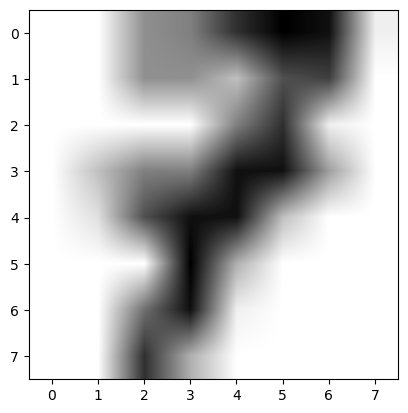

In [33]:
#used Pyplot to confirm digits upclose
plt.imshow(numbers_np[7].reshape(8, 8), cmap="binary", 
           interpolation="bilinear")
plt.show()

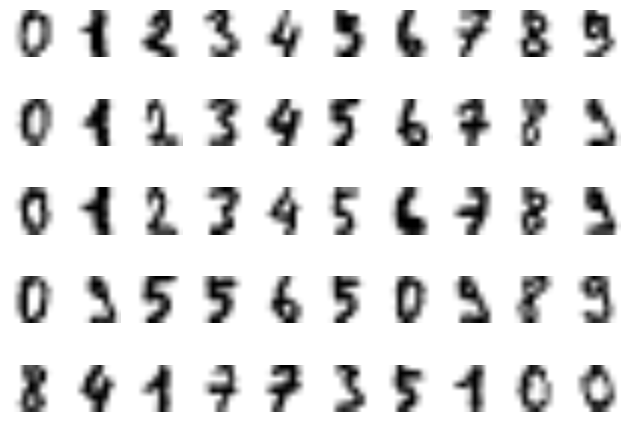

In [34]:
#used Pyplot to examine multiple digits and confirmed labels
for i in range(50):
    plt.subplot(5, 10, i + 1) 
    plt.imshow(numbers_np[i].reshape(8, 8), cmap="binary", 
               interpolation="bilinear")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [35]:
for i in range(50):
    print(f"{i} {labels_np[i]}")
#as we can see from the output, 
#the first 50 numbers match the Values column

0 0.0
1 1.0
2 2.0
3 3.0
4 4.0
5 5.0
6 6.0
7 7.0
8 8.0
9 9.0
10 0.0
11 1.0
12 2.0
13 3.0
14 4.0
15 5.0
16 6.0
17 7.0
18 8.0
19 9.0
20 0.0
21 1.0
22 2.0
23 3.0
24 4.0
25 5.0
26 6.0
27 7.0
28 8.0
29 9.0
30 0.0
31 9.0
32 5.0
33 5.0
34 6.0
35 5.0
36 0.0
37 9.0
38 8.0
39 9.0
40 8.0
41 4.0
42 1.0
43 7.0
44 7.0
45 3.0
46 5.0
47 1.0
48 0.0
49 0.0


In [36]:
#used labelled digits (y) to train a Logistic Regression 
#classifier from the features of individually labelled digits (X) 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numbers_np[:50])  
y = labels_np[:50]

regression = LogisticRegression(max_iter=500, solver='lbfgs')  
regression.fit(X_scaled, y)

LogisticRegression(max_iter=500)

In [37]:
#loaded a labelled test set
with open('digits_labeled.pkl', 'rb') as file:
    data2 = pickle.load(file)
data2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Value
0,0.0,1.0,10.0,13.0,2.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,9.0,13.0,11.0,10.0,9.0,0.0,2
1,0.0,0.0,15.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,13.0,10.0,6.0,2.0,0.0,2
2,0.0,0.0,1.0,10.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,14.0,4.0,0.0,0.0,5
3,0.0,1.0,10.0,16.0,15.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,10.0,15.0,2.0,0.0,0.0,0.0,7
4,0.0,0.0,4.0,14.0,15.0,6.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,13.0,15.0,9.0,0.0,0.0,9


In [38]:
#used Logistic Regression model to determine 
#the accuracy of labelling numbers
X_test = data2.iloc[:, :-1] 
y_test = data2.iloc[:, -1]  

X_test_scaled = scaler.transform(X_test)

y_pred = regression.predict(X_test_scaled)

# evaluating accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(test_accuracy)

0.8666666666666667


In [39]:
#created a cluster that has 50 classes of images based on the labeled data
from sklearn.cluster import KMeans 
X_50 = numbers_np[:50]
kmeans = KMeans(n_clusters=50, random_state=42)

kmeans.fit(X_50)
clusters = kmeans.labels_
print(clusters)

[ 2 20 14 16 29  8 12 41 33 23 42 47 10 21 48 30  5 17  0 45 25  4 34 13
 18 22 46  6 39  1 40 35 24 49 38 11 43 28 32 19 15  3 44 37  9 36  7 26
 31 27]


/software/anaconda3/2023.07-2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
#for each of the 50 classes determined a centroid 
#and a representative image that is closest to the value
distances = kmeans.fit_transform(X_50)

closest_indices = []

for cluster_idx in range(50): 
    cluster_distances = distances[:, cluster_idx]
    
    closest_idx = np.argmin(cluster_distances)
    closest_indices.append(closest_idx)

print(closest_indices)

[18, 29, 0, 41, 21, 16, 27, 46, 5, 44, 12, 35, 6, 23, 2, 40, 3, 17, 24, 39, 1, 13, 25, 9, 32, 20, 47, 49, 37, 4, 15, 48, 38, 8, 22, 31, 45, 43, 34, 28, 30, 7, 10, 36, 42, 19, 26, 11, 14, 33]


/software/anaconda3/2023.07-2/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


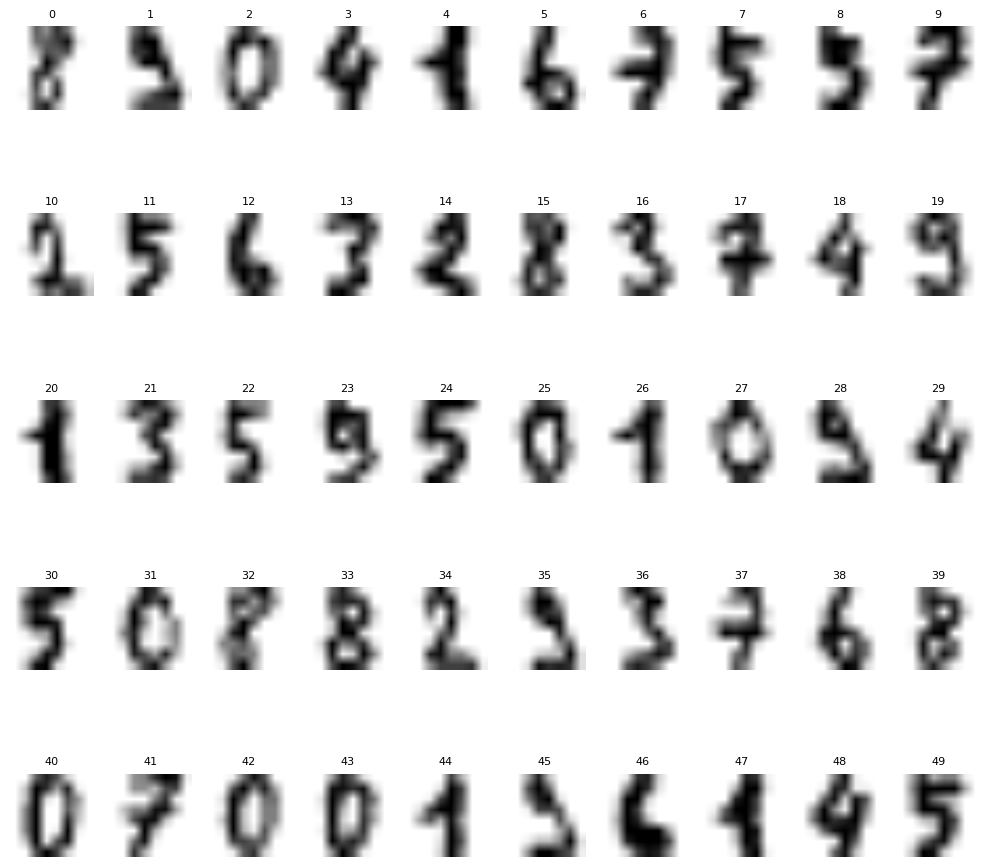

In [41]:
#visualizing images using Pyplot
plt.figure(figsize=(10, 10))  

for i, idx in enumerate(closest_indices):
    plt.subplot(5, 10, i + 1)  # Create a grid of 5 rows and 10 columns
    plt.imshow(numbers_np[idx].reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.title(f"{i}", fontsize=8)
    plt.axis("off") 

plt.tight_layout() 
plt.show()

In [42]:
#propagated labels from each representative image 
#to each one of the images in the individual 50 clusters
all_labels = kmeans.predict(numbers_np)
representative_labels = labels_np[closest_indices]
propagated_labels = np.empty(len(numbers_np), dtype=int)

# assigns labels to all images based on their cluster
for cluster_idx in range(50): 
    # finds all images assigned to the current cluster
    cluster_mask = all_labels == cluster_idx
    
    propagated_labels[cluster_mask] = representative_labels[cluster_idx]

print(representative_labels)
print(propagated_labels)

[8. 9. 0. 4. 1. 6. 7. 5. 5. 7. 2. 5. 6. 3. 2. 8. 3. 7. 4. 9. 1. 3. 5. 9.
 5. 0. 1. 0. 9. 4. 5. 0. 8. 8. 2. 9. 3. 7. 6. 8. 0. 7. 0. 0. 1. 9. 6. 1.
 4. 5.]
[0 1 2 ... 4 4 7]


In [43]:
#trained a Logistic Regression model using 
#newly labelled data and determined accuracy (results in the comment below)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(numbers_np,
                                                    propagated_labels,
                                                    test_size=0.2, 
                                                    random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
#clustering data to provide learned labels has proved to bring 
#better accuracy (0.89 vs 0.86 prior to that)

0.8928571428571429
